<h1> Überschrift 1 </h1>
Zuerst werden zufällig Datensätze angelegt (und diese in einem Scatterplot dargestellt -> Zu viele Merkmale, kann nur 2 darstellen im Scatterplot)

[0 1 2 0 0 3 2 0 3 2 3 3 1 1 3 0 1 2 1 2 0 0 2 1 3 0 3 3 3 1 2 3 0 1 3 2 3
 2 2 3 3 3 3 2 1 3 1 3 1 2 1 2 0 2 2 2 0 3 0 3 2 3 3 1 2 1 0 1 2 2 3 2 0 2
 0 3 3 1 2 0 2 0 3 0 1 0 1 1 2 3 0 3 1 0 1 0 1 2 0 3 2 1 2 3 2 3 1 1 2 2 3
 1 2 2 2 1 2 3 1 3 2 1 3 0 2 3 0 0 0 0 0 0 3 3 3 3 1 3 1 3 3 1 2 1 0 3 1 0
 3 0 3 2 0 2 2 0 2 3 0 3 1 2 1 3 2 2 2 0 3 0 2 2 3 1 1 3 1 3 1 3 2 0 2 0 2
 2 2 1 1 1 3 0 1 1 1 3 3 2 2 1 1 3 3 1 1 1 2 3 0 3 0 1 3 0 3 2 0 2 1 2 0 0
 0 1 0 1 0 3 1 0 3 3 2 1 2 2 2 0 3 2 1 2 1 1 0 1 3 1 2 0 2 2 3 0 3 2 2 3 0
 1 2 1 2 2 3 1 1 3 1 3 3 1 3 0 1 1 2 1 1 3 3 0 0 1 1 3 0 3 0 1 0 2 2 1 3 0
 2 0 3 1 2 1 3 2 3 3 3 3 3 3 2 3 3 0 0 2 3 1 0 1 2 1 2 0 3 0 3 1 1 0 2 2 1
 2 1 3 0 2 0 3 3 3 2 2 2 0 3 2 3 1 2 1 3 3 1 2 3 1 0 3 0 0 0 0 2 1 1 3 1 3
 1 2 3 2 3 2 0 2 0 0 3 1 1 0 2 3 0 0 2 1 2 0 0 0 3 1 1 1 3 2 1 1 0 3 2 1 3
 0 1 2 0 2 3 2 0 1 1 1 0 3 0 2 3 2 0 0 2 0 1 0 2 0 2 3 3 3 3 2 0 2 1 2 1 3
 1 3 0 3 0 1 1 3 0 1 2 0 3 1 3 2 1 0 2 0 1 2 2 1 2 1 2 1 3 2 0 3 2 1 0 0 0
 1 3 1 1 0 1 2 0 1 3 3 1 

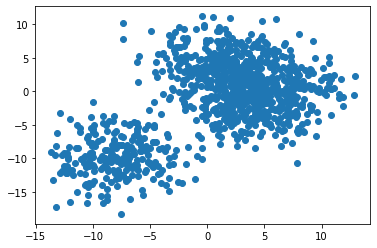

In [60]:
from sklearn.datasets import make_blobs
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#Doku für make_blobs
X , y= make_blobs(n_samples = 1000, n_features=5, centers=4, cluster_std=3, random_state=0)
#X = The generated samples (Xndarray [ndarray = n dimensionales array] of shape (n_samples, n_features))
#y = The integer labels for cluster membership of each sample ((n_samples,)-> Nicht notwendig?

#print(X)
#print("-----------")
#print(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1]) # Stellt die Verteilung der 1000 Samples anhand der ersten 2 Merkmale dar
# X[:,0] Alles aus der ersten Spalte -> Stellt nur das erste Merkmal dar
#X[:,1] alles aus der zweiten Spalte -> Stellt nur das zweite Merkmal dar

Die blauen Punkte stellen 1000 Kunden dar, diese sollen in vier Gruppen wie zB Bonitäts- oder Prioritätsklassen anhand der fünf Merkmale segementiert werden.

<h2> Visualisierung der Abhängigkeiten mit seaborn.pairplot </h2>

     Bonität  Priorität  Merkmal3  Merkmal4  Merkmal5
0          4          1         0         3         0
1          1         -2         2         7        -1
2          4          0         5        11       -16
3          0          2         3        -3        -1
4          2          1         0         0        -4
..       ...        ...       ...       ...       ...
995        0         -2         9        11         1
996        0         -2         9        12        -1
997       -7        -14         5        11         5
998        3          6         0        11       -11
999      -10        -12        11         5         9

[1000 rows x 5 columns]


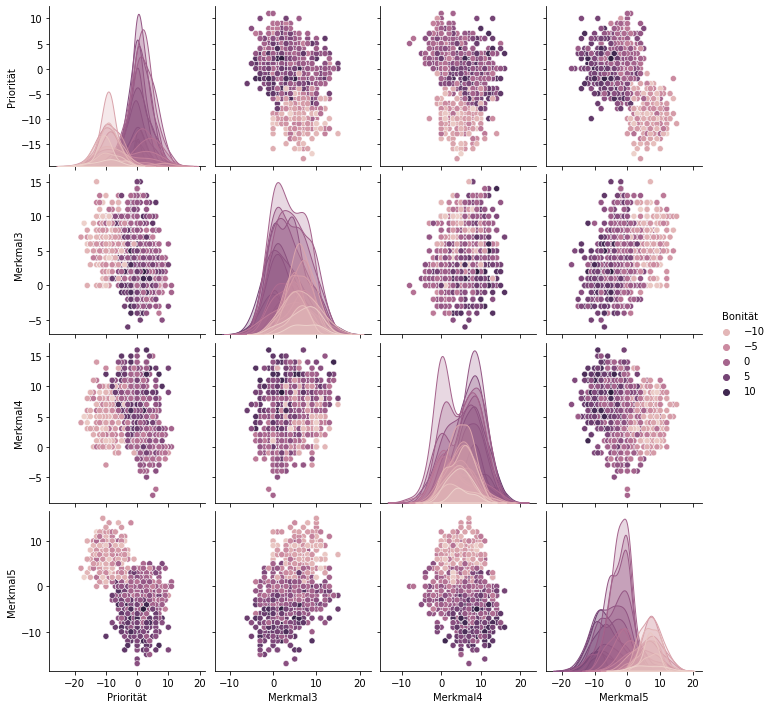

In [65]:
# Umwandlung zum DataFrome Objekt notwendig, ansonsten kann es nicht mit paiplot dargestellt werden!
df = pd.DataFrame(X, columns = ['Bonität', 'Priorität', 'Merkmal3', 'Merkmal4', 'Merkmal5'], dtype= int) #Was ist ein DF Object? -> Erklären
#df['cluster'] = y
print(df)

sns.pairplot(df, hue = 'Bonität') # hue ergibt hier erst nach der bilden von Klassen Sinn, zb 1-2, 2-3 und so weiter. Hier durch die Umwandlung zu Integer erfolgt

Auf den Achsen stellen 0 - 4 die einzelnen Merkmale dar.
Anmerkung: Corner = True kürzt Spiegelung weg, evtl. im zweiten Schritt nachher so darstellen, nachdem es komplett dargestellt wurde